## How to look at MITgcm netCDF output, an example

You need to install MITgcmutils package (https://pypi.org/project/MITgcmutils/)

In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import matplotlib as mpl
import numpy as np
import xarray as xr
import MITgcmutils as MIT
import seaborn as sns

In [2]:
sns.set_context('notebook')
outdir = '/Volumes/Esteban_SSD/Maestría/MITgcm/verification/BayIW/run01/mnc_0001/'

In [3]:
nc = MIT.mnc_files(outdir+'state.0000000000.t*.nc')
gr = MIT.mnc_files(outdir+'grid.t*.nc')

In [4]:
# Load some grid variables
depth = gr.variables['Depth'][:]
hFacC = gr.variables['HFacC'][:]
XC = gr.variables['XC'][:]
YC = gr.variables['YC'][:]
XG = gr.variables['XG'][:]
YG = gr.variables['YG'][:]
RC = gr.variables['RC'][:]
RL = gr.variables['RL'][:]
mask = np.ma.getmask(np.ma.masked_values(depth, 0))
mask3D = np.ma.getmask(np.ma.masked_values(hFacC[:,:], 0))
time = nc.variables['T'][:102]
timetotal = nc.variables['T'][:]

In [5]:
time

array([    0.,  1200.,  2400.,  3600.,  4800.,  6000.,  7200.,  8400.,
        9600., 10800., 12000., 13200., 14400., 15600., 16800., 18000.,
       19200., 20400., 21600., 22800., 24000., 25200., 26400., 27600.,
       28800., 30000., 31200., 32400., 33600., 34800., 36000.])

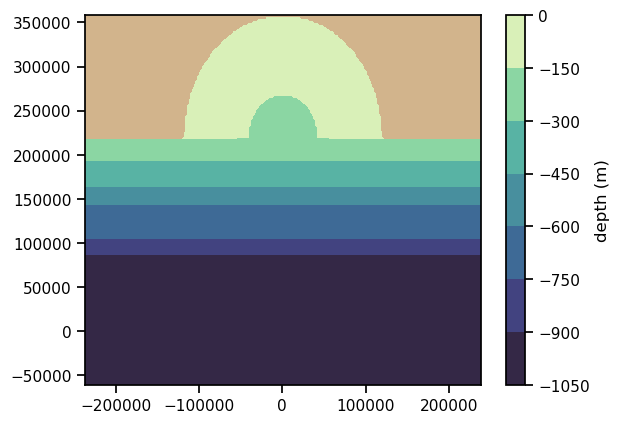

In [6]:
# Plot bathymetry
fig, ax = plt.subplots(1,1)
ax.set_facecolor('tan')
pc = ax.contourf(XC[0,:],YC[:,0],
                np.ma.masked_array(-depth, mask=mask),
                cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc, label='depth (m)')


In [7]:
time

array([    0.,  1200.,  2400.,  3600.,  4800.,  6000.,  7200.,  8400.,
        9600., 10800., 12000., 13200., 14400., 15600., 16800., 18000.,
       19200., 20400., 21600., 22800., 24000., 25200., 26400., 27600.,
       28800., 30000., 31200., 32400., 33600., 34800., 36000.])

In [8]:
W = nc.variables['W']
W.shape

(31, 40, 180, 240)

In [9]:
RC[25]

-222.39999999999995

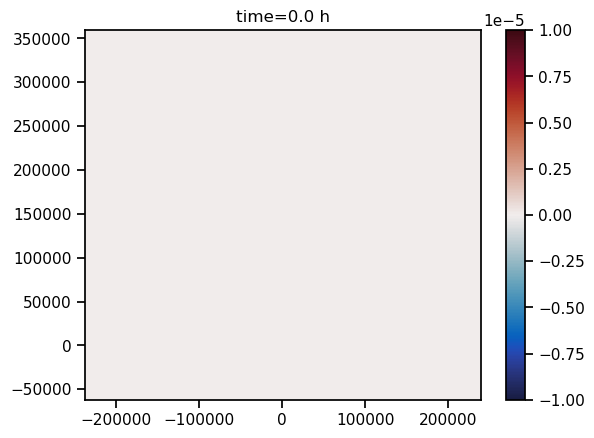

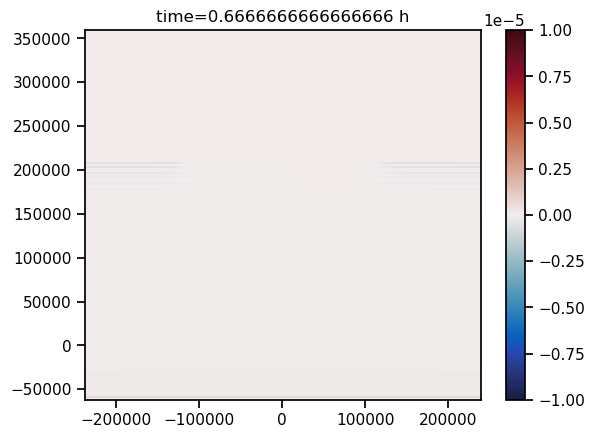

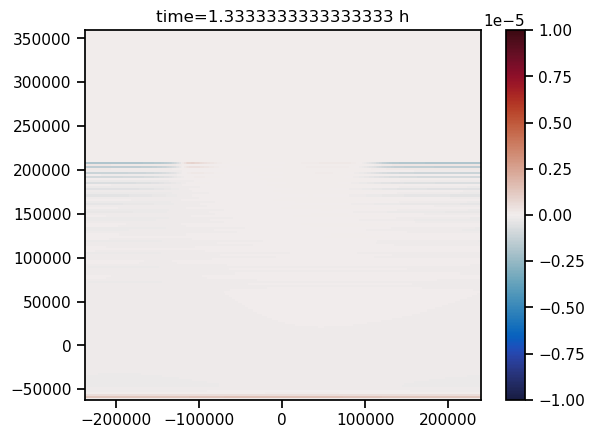

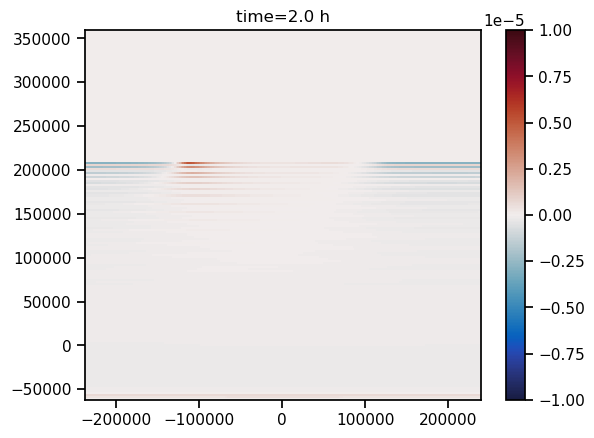

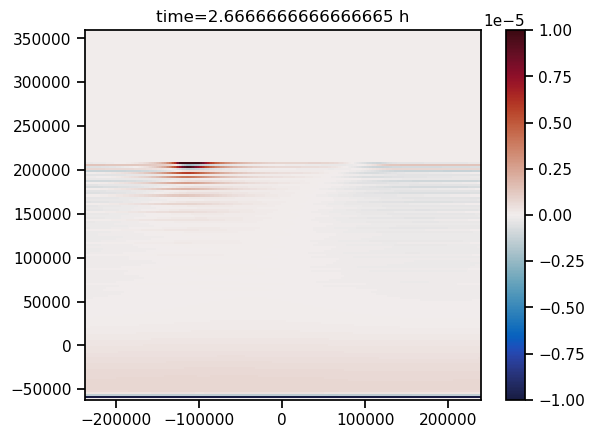

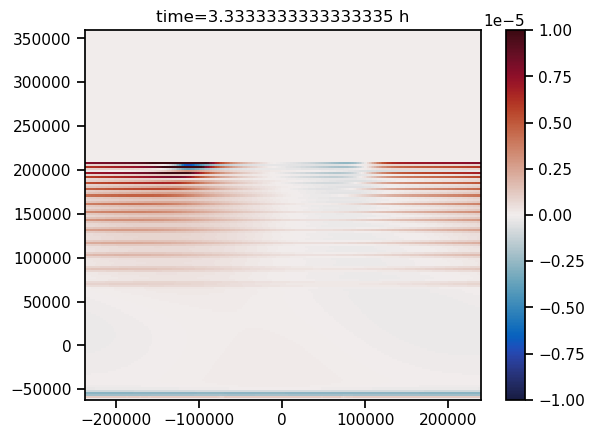

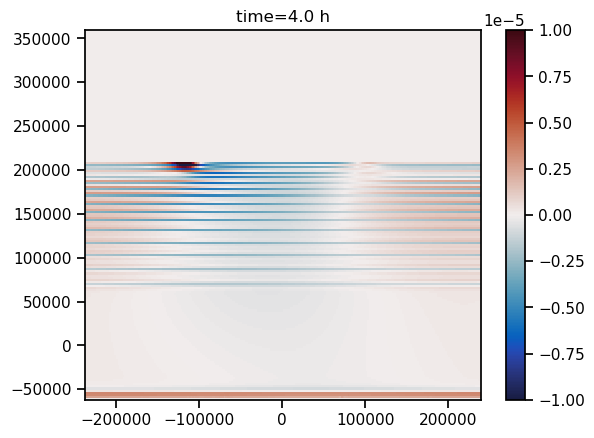

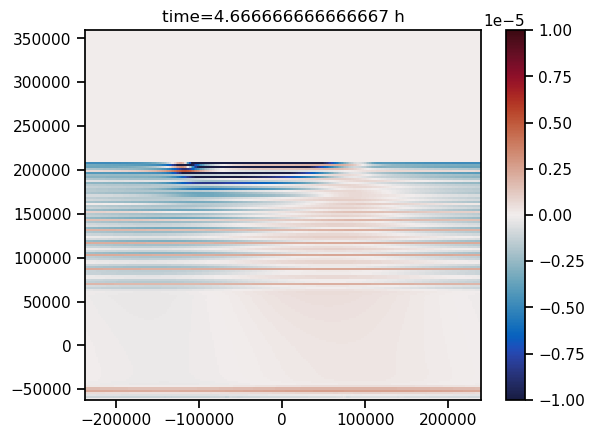

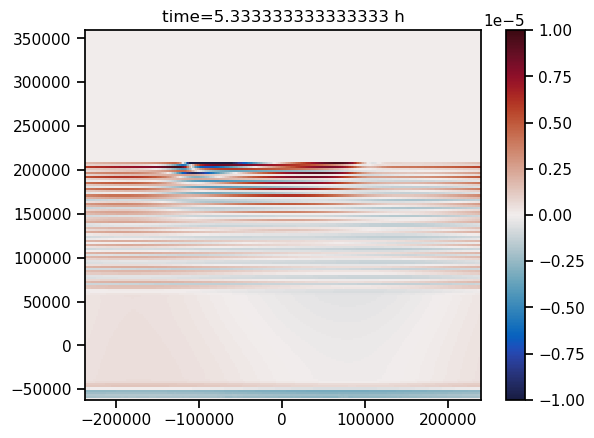

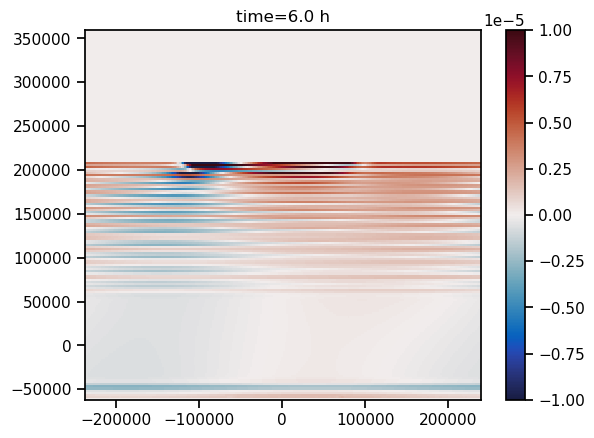

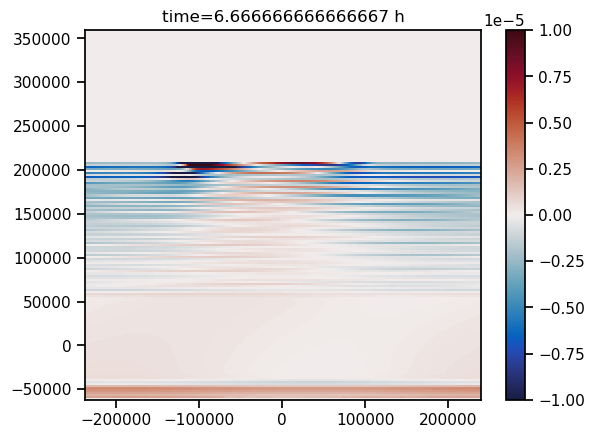

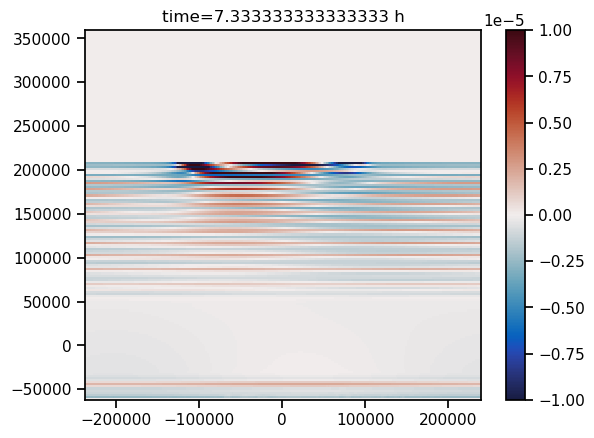

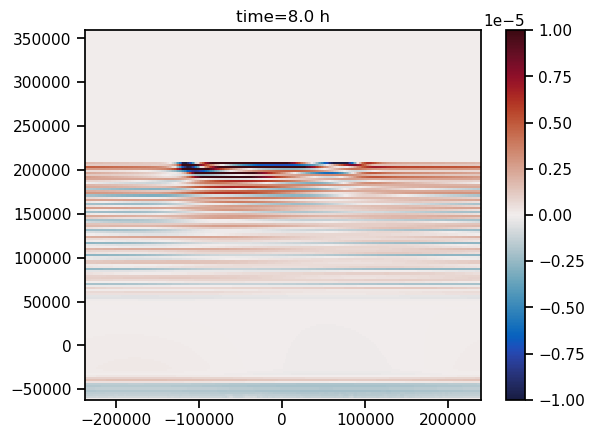

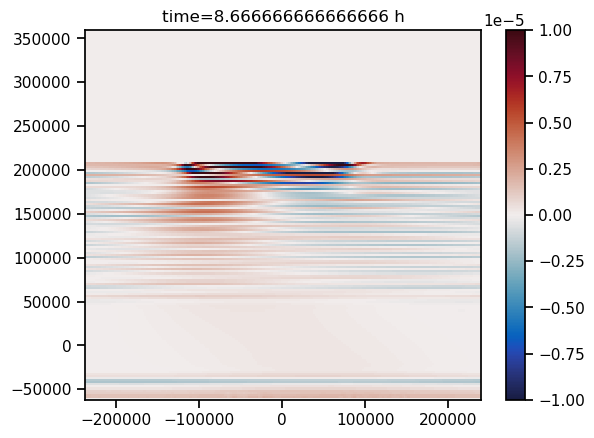

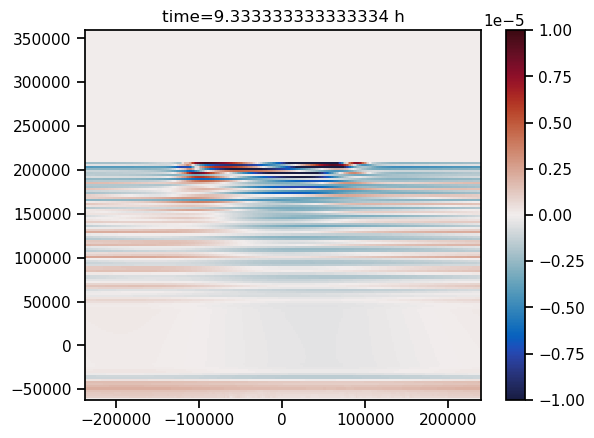

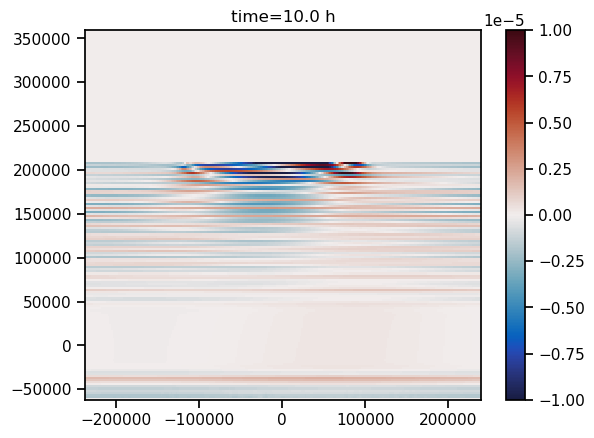

In [10]:
#Velocidad vertical (W) a los 222.40 m de profundidad.
for tt in range(0,31,2):
    W = nc.variables['W'][tt,25,:,:]
    plt.pcolormesh(XC[0,:],YC[:,0],W,vmin=-1E-5, vmax=1E-5, cmap=cmo.cm.balance)
    plt.colorbar()
    plt.title(f'time={time[tt]/3600} h')
    plt.show()

In [11]:
np.shape(W)

(180, 240)

In [12]:
print(XC[0,100])
print(YC[120,0])

-37841.0
220064.25


In [13]:
XC.shape
print(XC[0,0])

-237004.2


In [14]:
2*24*3600

172800

In [15]:
nc.variables['T'][:]

array([    0.,  1200.,  2400.,  3600.,  4800.,  6000.,  7200.,  8400.,
        9600., 10800., 12000., 13200., 14400., 15600., 16800., 18000.,
       19200., 20400., 21600., 22800., 24000., 25200., 26400., 27600.,
       28800., 30000., 31200., 32400., 33600., 34800., 36000.])

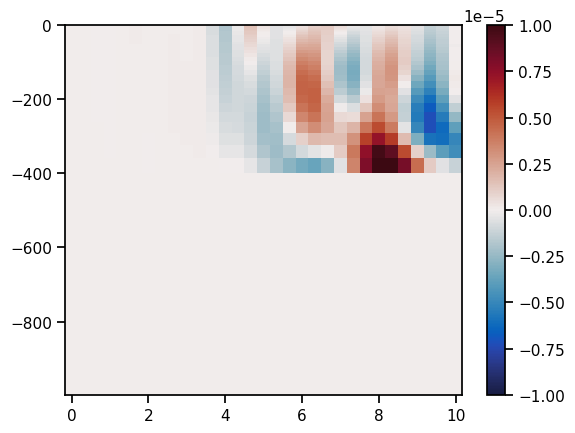

In [16]:
W = nc.variables['W'][:,:,100,120]
plt.pcolormesh(time/3600,RC,np.transpose(W),vmin=-1E-5, vmax=1E-5, cmap=cmo.cm.balance)
plt.colorbar()
plt.title(f'')
plt.show()